<a href="https://colab.research.google.com/github/fahmipp/datamining_assign4/blob/main/Tugas2_A11.2022.14523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1. Business Understanding
# Tujuan: Menganalisis faktor-faktor yang mempengaruhi kelayakan keringanan UKT mahasiswa

# 2. Data Understanding
# Memuat data
data = pd.read_csv('klasifikasimhs.csv')

In [ ]:
# Menampilkan informasi data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tempat Tinggal               100 non-null    int64 
 1   Pekerjaan Orang Tua          100 non-null    object
 2   Penghasilan Orang Tua        100 non-null    int64 
 3   Jumlah Tanggungan Orang Tua  100 non-null    int64 
 4   Kendaraan                    100 non-null    int64 
 5   Kelayakan Keringanan UKT     100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB
None
       Tempat Tinggal  Penghasilan Orang Tua  Jumlah Tanggungan Orang Tua  \
count      100.000000           1.000000e+02                   100.000000   
mean         0.500000           5.427000e+06                     2.590000   
std          0.502519           2.533128e+06                     1.129002   
min          0.000000           7.000000e+05                     1.000000   
2

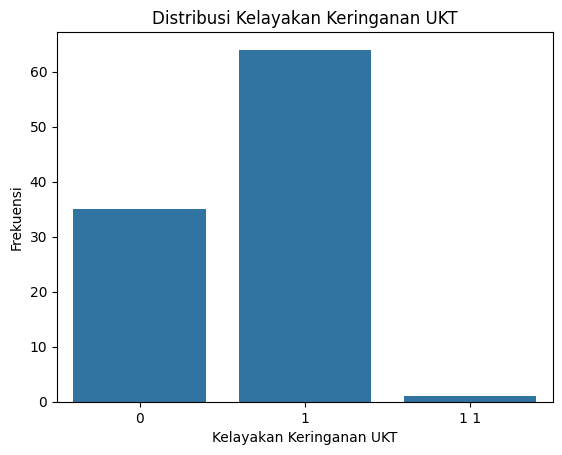

[[ 3  2]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        15

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20

Model disimpan sebagai 'model_klasifikasi.pkl'


In [ ]:
# Visualisasi distribusi kelayakan keringanan UKT
sns.countplot(x='Kelayakan Keringanan UKT', data=data)
plt.title('Distribusi Kelayakan Keringanan UKT')
plt.xlabel('Kelayakan Keringanan UKT')
plt.ylabel('Frekuensi')
plt.show()

# 3. Data Preparation
# Memisahkan fitur dan target
X = data.drop(columns=['Kelayakan Keringanan UKT'])
y = data['Kelayakan Keringanan UKT']

# Menggunakan OneHotEncoder untuk fitur kategorikal
categorical_features = ['Tempat Tinggal', 'Pekerjaan Orang Tua', 'Kendaraan']
numeric_features = ['Penghasilan Orang Tua', 'Jumlah Tanggungan Orang Tua']

# Membuat pipeline untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Fitur numerik
        ('cat', OneHotEncoder(), categorical_features)  # Fitur kategorikal
    ]
)

# 4. Modeling
# Membuat model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# 5. Evaluation
# memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6. Deployment
# Menyimpan model (opsional)
import joblib
joblib.dump(model, 'model_klasifikasi.pkl')

print("Model disimpan sebagai 'model_klasifikasi.pkl'")
